In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [109]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')


In [110]:
train_data.drop(['Unnamed: 0'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [111]:
train_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,30,male,3,own,little,little,3959,36,furniture/equipment,good
1,26,male,2,rent,moderate,NaN,3577,9,car,good
2,43,male,2,own,little,NaN,2515,18,furniture/equipment,good
3,27,male,2,own,moderate,moderate,1995,12,car,good
4,42,male,3,own,little,NaN,10366,60,car,good


In [112]:
test_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,28,male,3,own,little,moderate,5234,30,car,bad
1,24,female,2,rent,little,little,4308,48,business,bad
2,31,male,2,own,quite rich,NaN,3430,24,radio/TV,good
3,44,male,2,own,moderate,moderate,1804,12,car,good
4,34,male,2,own,little,moderate,2415,7,radio/TV,good


In [113]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               800 non-null    int64 
 1   Sex               800 non-null    object
 2   Job               800 non-null    int64 
 3   Housing           800 non-null    object
 4   Saving accounts   648 non-null    object
 5   Checking account  475 non-null    object
 6   Credit amount     800 non-null    int64 
 7   Duration          800 non-null    int64 
 8   Purpose           800 non-null    object
 9   Risk              800 non-null    object
dtypes: int64(4), object(6)
memory usage: 62.6+ KB


In [114]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               200 non-null    int64 
 1   Sex               200 non-null    object
 2   Job               200 non-null    int64 
 3   Housing           200 non-null    object
 4   Saving accounts   169 non-null    object
 5   Checking account  131 non-null    object
 6   Credit amount     200 non-null    int64 
 7   Duration          200 non-null    int64 
 8   Purpose           200 non-null    object
 9   Risk              200 non-null    object
dtypes: int64(4), object(6)
memory usage: 15.8+ KB


In [115]:
train_data.describe()

,Age,Job,Credit amount,Duration
count,800.000000,800.000000,800.000000,800.000000
mean,35.365000,1.897500,3216.402500,21.012500
std,11.104657,0.651939,2769.832249,11.927916
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2281.500000,18.000000
75%,42.000000,2.000000,3941.500000,24.000000
max,75.000000,3.000000,18424.000000,60.000000


In [116]:
train_data.describe(include=['O'])

,Sex,Housing,Saving accounts,Checking account,Purpose,Risk
count,800,800,648,475,800,800
unique,2,3,4,3,8,2
top,male,own,little,little,car,good
freq,544,566,480,222,262,563


In [117]:
def change_type_to_categorical(data, col):
    data[col] = data[col].astype('category')

category_col = ['Job', 'Sex' ,'Housing', 'Saving accounts', 'Checking account', 'Purpose']

for col in category_col:
    change_type_to_categorical(train_data, col)
    change_type_to_categorical(test_data, col)

In [118]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               800 non-null    int64   
 1   Sex               800 non-null    category
 2   Job               800 non-null    category
 3   Housing           800 non-null    category
 4   Saving accounts   648 non-null    category
 5   Checking account  475 non-null    category
 6   Credit amount     800 non-null    int64   
 7   Duration          800 non-null    int64   
 8   Purpose           800 non-null    category
 9   Risk              800 non-null    object  
dtypes: category(6), int64(3), object(1)
memory usage: 30.9+ KB


In [119]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               200 non-null    int64   
 1   Sex               200 non-null    category
 2   Job               200 non-null    category
 3   Housing           200 non-null    category
 4   Saving accounts   169 non-null    category
 5   Checking account  131 non-null    category
 6   Credit amount     200 non-null    int64   
 7   Duration          200 non-null    int64   
 8   Purpose           200 non-null    category
 9   Risk              200 non-null    object  
dtypes: category(6), int64(3), object(1)
memory usage: 8.7+ KB


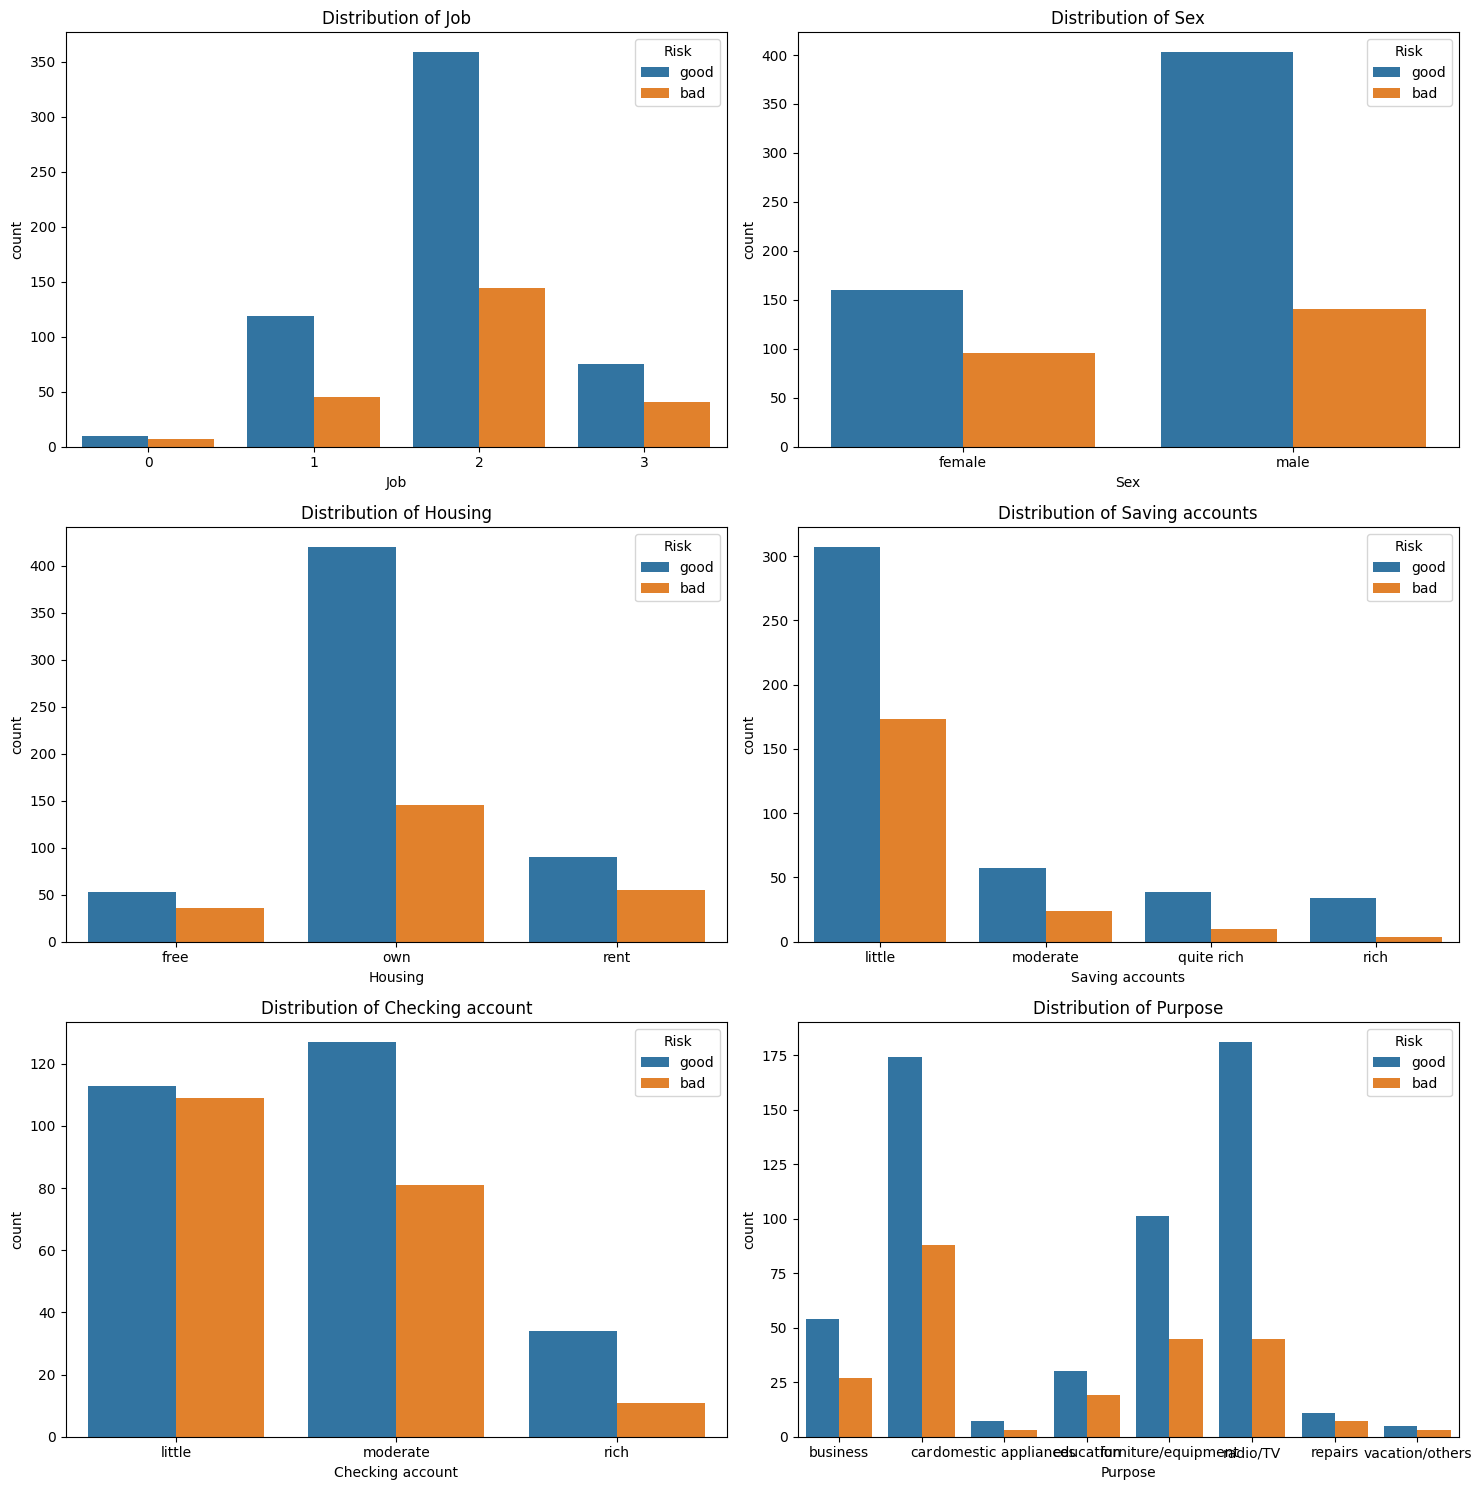

In [120]:
def plot_distribution(data, col, ax):
    sns.countplot(x=col, data=data, ax=ax, hue='Risk')
    ax.set_title(f"Distribution of {col}")

fig, ax = plt.subplots(3, 2, figsize=(15, 15))
ax = ax.flatten()
for i, col in enumerate(category_col):
    plot_distribution(train_data, col, ax[i])
plt.tight_layout()

In [121]:
train_data['Purpose'] = train_data['Purpose'].replace(['radio/TV', 'education', 'furniture/equipment', 'car', 'business', 'domestic appliances', 'repairs', 'vacation/others'], ['household', 'household', 'household', 'car', 'business', 'household', 'household', 'household'])
test_data['Purpose'] = test_data['Purpose'].replace(['radio/TV', 'education', 'furniture/equipment', 'car', 'business', 'domestic appliances', 'repairs', 'vacation/others'], ['household', 'household', 'household', 'car', 'business', 'household', 'household', 'household'])

In [122]:
train_data['Purpose'].value_counts().to_frame()

,count
Purpose,
household,457
car,262
business,81


C:\Users\vanhu\AppData\Local\Temp\ipykernel_13748\3820158119.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax)
C:\Users\vanhu\AppData\Local\Temp\ipykernel_13748\3820158119.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax)
C:\Users\vanhu\AppData\Local\Temp\

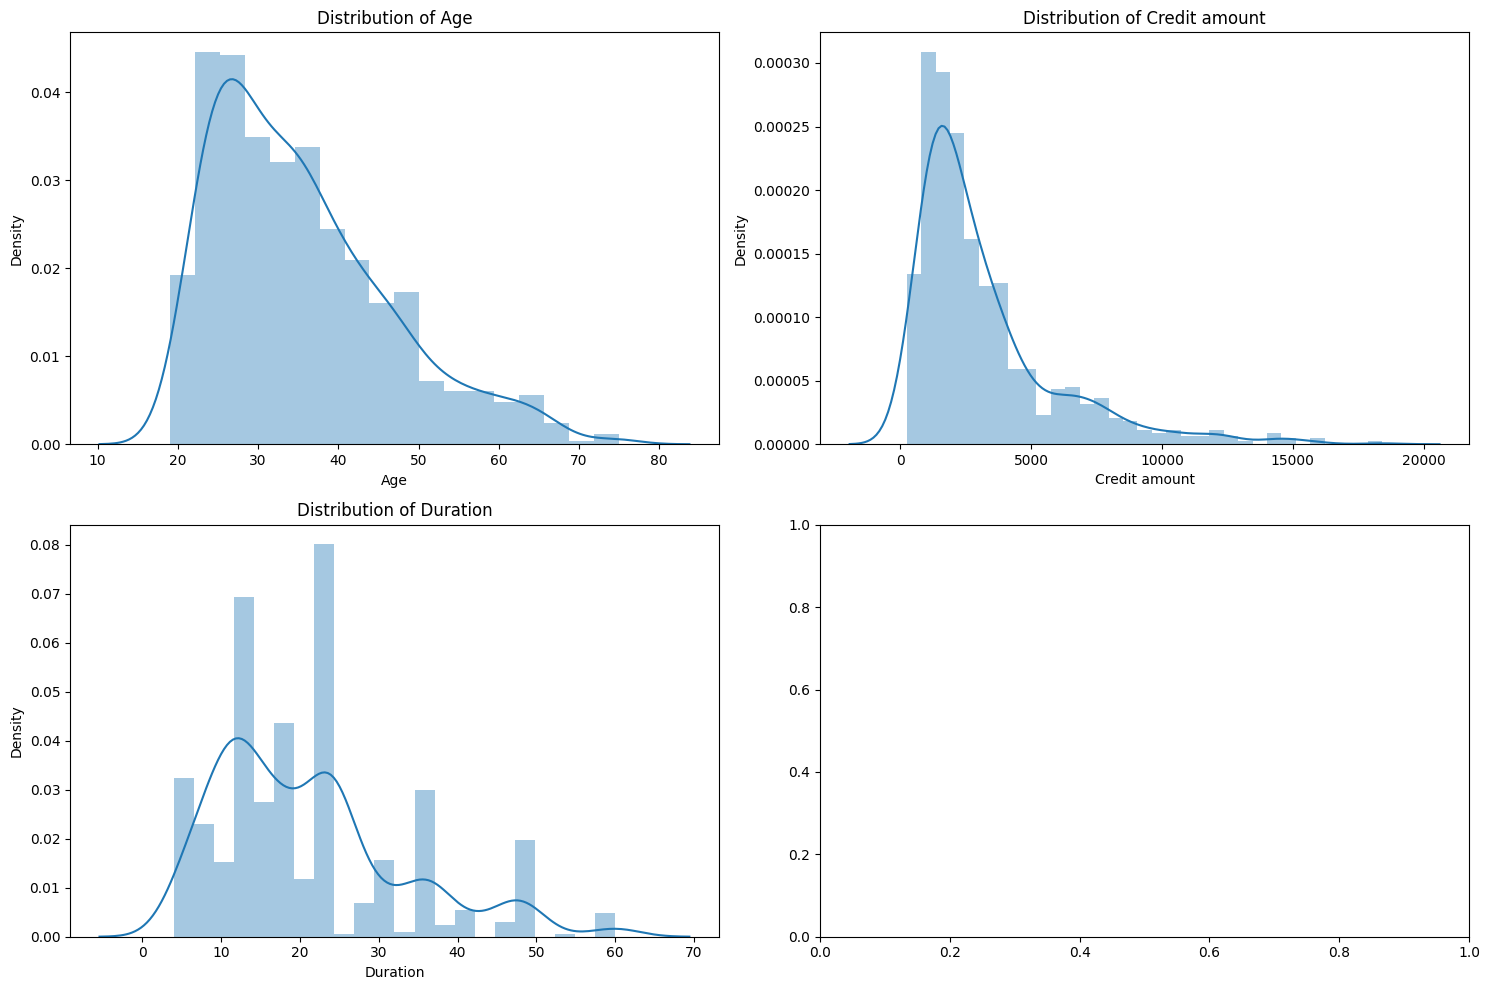

In [123]:
def plot_numerical(data, col, ax):
    sns.distplot(data[col], ax=ax)
    ax.set_title(f"Distribution of {col}")

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.flatten()
for i, col in enumerate(['Age', 'Credit amount', 'Duration']):
    plot_numerical(train_data, col, ax[i])

plt.tight_layout()

In [124]:
train_data['Risk'].value_counts().to_frame()

,count
Risk,
good,563
bad,237


In [125]:
train_data['Risk'].value_counts(normalize=True).to_frame()

,proportion
Risk,
good,0.70375
bad,0.29625


In [126]:
def display_missing(data):
    for col in data.columns:
        missing_data = data[col].isna().sum()
        missing_percent = missing_data/len(data) * 100
        print(f"Column {col}: has {missing_percent}%")

In [127]:
display_missing(train_data)


Column Age: has 0.0%
Column Sex: has 0.0%
Column Job: has 0.0%
Column Housing: has 0.0%
Column Saving accounts: has 19.0%
Column Checking account: has 40.625%
Column Credit amount: has 0.0%
Column Duration: has 0.0%
Column Purpose: has 0.0%
Column Risk: has 0.0%


In [128]:
display_missing(test_data)

Column Age: has 0.0%
Column Sex: has 0.0%
Column Job: has 0.0%
Column Housing: has 0.0%
Column Saving accounts: has 15.5%
Column Checking account: has 34.5%
Column Credit amount: has 0.0%
Column Duration: has 0.0%
Column Purpose: has 0.0%
Column Risk: has 0.0%


In [129]:
train_data['Saving accounts'].value_counts().to_frame()

,count
Saving accounts,
little,480
moderate,81
quite rich,49
rich,38


In [130]:
train_data['Checking account'].value_counts().to_frame()

,count
Checking account,
little,222
moderate,208
rich,45


In [131]:
train_data['Checking account'] = train_data.groupby(['Housing','Job'])['Checking account'].transform(lambda x: x.fillna(x.value_counts().index[0]))
train_data['Saving accounts'] = train_data.groupby(['Housing','Job'])['Saving accounts'].transform(lambda x: x.fillna(x.value_counts().index[0]))

In [132]:
test_data['Checking account'] = test_data.groupby(['Housing','Job'])['Checking account'].transform(lambda x: x.fillna(x.value_counts().index[0]))
test_data['Saving accounts'] = test_data.groupby(['Housing','Job'])['Saving accounts'].transform(lambda x: x.fillna(x.value_counts().index[0]))


In [133]:
display_missing(train_data)

Column Age: has 0.0%
Column Sex: has 0.0%
Column Job: has 0.0%
Column Housing: has 0.0%
Column Saving accounts: has 0.0%
Column Checking account: has 0.0%
Column Credit amount: has 0.0%
Column Duration: has 0.0%
Column Purpose: has 0.0%
Column Risk: has 0.0%


In [134]:
display_missing(test_data)

Column Age: has 0.0%
Column Sex: has 0.0%
Column Job: has 0.0%
Column Housing: has 0.0%
Column Saving accounts: has 0.0%
Column Checking account: has 0.0%
Column Credit amount: has 0.0%
Column Duration: has 0.0%
Column Purpose: has 0.0%
Column Risk: has 0.0%


In [135]:
train_data['Age_Cat'] = pd.cut(train_data['Age'], bins=[18, 25, 35, 45, 55, 65], labels=['Young', 'Young Adult', 'Adult', 'Middle Age', 'Old'])
test_data['Age_Cat'] = pd.cut(test_data['Age'], bins=[18, 25, 35, 45, 55, 65], labels=['Young', 'Young Adult', 'Adult', 'Middle Age', 'Old'])


In [136]:
change_type_to_categorical(train_data, 'Age_Cat')
change_type_to_categorical(test_data, 'Age_Cat')


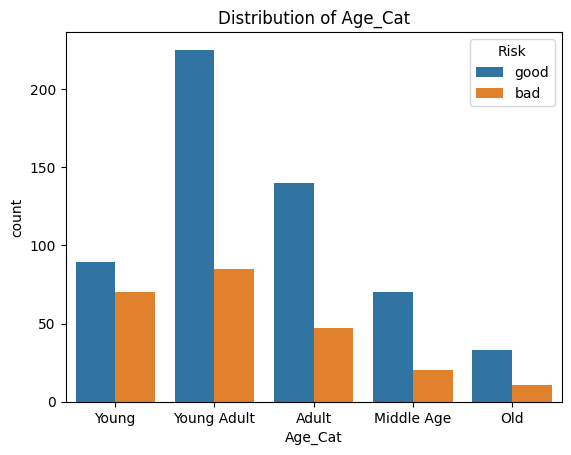

In [137]:
plot_distribution(train_data, 'Age_Cat', ax=plt.gca())

In [138]:
train_data['Age_Cat'].value_counts().to_frame()

,count
Age_Cat,
Young Adult,310
Adult,187
Young,159
Middle Age,90
Old,44


In [139]:
numeric_col = ['Credit amount', 'Duration']
category_col = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk', 'Age_Cat']

columns = numeric_col + category_col

print(columns)

['Credit amount', 'Duration', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk', 'Age_Cat']


In [140]:
X = train_data[columns]
y = train_data['Risk']

X_test = test_data[columns]
y_test = test_data['Risk']

In [141]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_col),
    ('cat', categorical_transformer, category_col)
])

In [142]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Credit amount', 'Duration']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 ['Sex', 'Job', 'Housing', 'Saving accounts',
                                  'Checking account', 'Purpose', 'Risk',
                                  'Age_Cat'])])

In [143]:
X = preprocessor.transform(X)


In [144]:
X_test = preprocessor.transform(X_test)

In [147]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
y_test = le.transform(y_test)



In [149]:
print(X.shape, y.shape, X_test.shape, y_test.shape)

(800, 28) (800,) (200, 28) (200,)


In [151]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [153]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(640, 28) (640,) (160, 28) (160,)
(200, 28) (200,)


In [154]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [155]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred = knn.predict(X_val)
print(f"Accuracy: {accuracy_score(y_val, y_pred)}")
print(f"Precision: {precision_score(y_val, y_pred)}")
print(f"Recall: {recall_score(y_val, y_pred)}")
print(f"F1: {f1_score(y_val, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_val, y_pred)}")
print(f"Classification Report: \n{classification_report(y_val, y_pred)}")


Accuracy: 0.96875
Precision: 0.9576271186440678
Recall: 1.0
F1: 0.9783549783549783
Confusion Matrix: 
[[ 42   5]
 [  0 113]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        47
           1       0.96      1.00      0.98       113

    accuracy                           0.97       160
   macro avg       0.98      0.95      0.96       160
weighted avg       0.97      0.97      0.97       160



In [156]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(5, 20, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid = GridSearchCV(knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(5, 20, 2),
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [158]:
print(f'Besst Score: {grid.best_score_}')

Besst Score: 0.9953125


In [159]:
print(f'Best Params: {grid.best_params_}')

Best Params: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


In [160]:
grid.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

In [161]:
grid.best_estimator_.fit(X_train, y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

In [164]:
y_pred_after_tuning = grid.best_estimator_.predict(X_val)
print(f"Accuracy: {accuracy_score(y_val, y_pred_after_tuning)}")
print(f"Precision: {precision_score(y_val, y_pred_after_tuning)}")
print(f"Recall: {recall_score(y_val, y_pred_after_tuning)}")
print(f"F1: {f1_score(y_val, y_pred_after_tuning)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_val, y_pred_after_tuning)}")
print(f"Classification Report: \n{classification_report(y_val, y_pred_after_tuning)}")


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
Confusion Matrix: 
[[ 47   0]
 [  0 113]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00       113

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



In [165]:
y_test_pred = grid.best_estimator_.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(f"Precision: {precision_score(y_test, y_test_pred)}")
print(f"Recall: {recall_score(y_test, y_test_pred)}")
print(f"F1: {f1_score(y_test, y_test_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_test_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_test_pred)}")


Accuracy: 0.985
Precision: 0.9785714285714285
Recall: 1.0
F1: 0.9891696750902527
Confusion Matrix: 
[[ 60   3]
 [  0 137]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        63
           1       0.98      1.00      0.99       137

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200

